In [1]:
# La importación la eliminaré cuando acabe el script de transformar.
# La pongo para importar el df.
import pandas as pd

def extract(json_name):
    df = pd.read_json(json_name, encoding = 'utf8')
    return df

df = extract("Reggaeton_lyrics.json")
df.head()

,Artist,Title,Lyrics
0,Karol G,Ocean,"[Si algún día te vas de casa (de casa), Yo te ..."
1,Karol G,Dices Que Te Vas (part. Anuel AA),"[No sé, no-no sé, Yo me despierto y busco tus ..."
10,Karol G,Go Karo,"[O-O-Ovy On The Drums, Go, Karo!, Enloqueció l..."
100,Daddy Yankee,Soltera (remix),"[[Bad Bunny y daddy yankee], Épico, Salte 'el ..."
101,Daddy Yankee,Con Calma (remix) (part. Katy Perry y Snow),"[D-D-D-D-D-DY, ¡Ay, Daddy!, Play N' Skillz, Ka..."


In [ ]:
"""
from textblob import TextBlob

def analyze_spanish_sentiment(l):
    song_translated = []
    # noun_phrases = []
    sentim = []
    try:
        for verse in l:
            blob = TextBlob(verse)
            verse_translated = blob.translate(to="en")
            song_translated.append(verse_translated)
            # noun_phrases.append(verse_translated.noun_phrases) # No me convencen los resultados.
            sentim.append(verse_translated.sentiment.polarity)
    except:
        pass
    return song_translated, sentim
"""

In [2]:
def translate_list(l):
    list_translated = []
    try:
        for line in l:
            blob = TextBlob(line)
            line_translated = blob.translate(to="en")
            list_translated.append(line_translated)
    except:
        pass
    return list_translated

def analyze_sentiment(l):
    sentim = []
    try:
        for line in l:
            blob = TextBlob(line)
            sentim.append(blob.sentiment.polarity)
    except:
        pass
    return sentim

In [3]:
df['Translation'] = df['Lyrics'].apply(translate_list)
df['Sentiment'] = df['Lyrics'].apply(analyze_sentiment)

In [4]:
df.head()

,Artist,Title,Lyrics,Translation,Sentiment
0,Karol G,Ocean,"[Si algún día te vas de casa (de casa), Yo te ...",[],[]
1,Karol G,Dices Que Te Vas (part. Anuel AA),"[No sé, no-no sé, Yo me despierto y busco tus ...",[],[]
10,Karol G,Go Karo,"[O-O-Ovy On The Drums, Go, Karo!, Enloqueció l...",[],[]
100,Daddy Yankee,Soltera (remix),"[[Bad Bunny y daddy yankee], Épico, Salte 'el ...",[],[]
101,Daddy Yankee,Con Calma (remix) (part. Katy Perry y Snow),"[D-D-D-D-D-DY, ¡Ay, Daddy!, Play N' Skillz, Ka...",[],[]


In [5]:
import statistics
df['Sent_mean'] = df['Sentiment'].apply(statistics.mean)

StatisticsError: mean requires at least one data point

In [ ]:
df.head(20)

In [ ]:
# Media del sentimiento por canción
# Nube de palabras de todas las canciones. Antes habrá que eliminar las stopwords
# Hacer stemming para que la nube sea más concluyente. snowballstemmer
# get_max_freq

In [7]:
def flatten_list(l):
    """
    Receive a list of lists and return a list with just one element.
    """
    return sum(l, [])

In [49]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
def remove_stopwords(l):
    new_list = []
    stop_words = stopwords.words('spanish')
    more_stopwords = ['si', 'pa', 'sé', 'solo', 'yeah', 'yeh', 'oh', 'i', 'to', 'va', 'the', 'aunque', 'you', 'eh', 'cómo']
    total_stopwords = stop_words + more_stopwords
    for sentence in l:
        sentence = sentence.lower() # Si no lo pongo, no me elimina las palabras que empiezan por mayúscula (ejemplo: Y, Que)
        word_tokens = word_tokenize(sentence) 
        filtered_sentence = [w for w in word_tokens if not w in total_stopwords]
        filtered_sentence = [word.lower() for word in filtered_sentence if word.isalpha()]
        new_list.append(filtered_sentence)
    return flatten_list(new_list)

In [51]:
df['No_stopwords'] = df['Lyrics'].apply(remove_stopwords)

In [52]:
relevant_words = pd.Series(df['No_stopwords'].sum())
relevant_words.value_counts()

quiero         286
amor           234
baby           214
ahora          155
así            137
vida           133
quiere         128
bien           124
baila          117
siempre        117
hoy            112
dura           110
voy            106
corazón        103
bebé            98
mejor           94
aquí            93
dime            86
conmigo         84
nunca           83
gusta           82
ver             81
vez             78
daddy           76
nadie           75
quieres         75
bunny           74
bad             73
noche           73
ser             73
              ... 
caderas          1
marea            1
ñejo             1
morirme          1
mirándote        1
freaky           1
vacilou          1
letras           1
repetición       1
jura             1
ponce            1
honoring         1
respondes        1
next             1
leyéndote        1
aquele           1
weekend          1
matón            1
bellaqueos       1
maleta           1
nubes            1
querias     

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Nube de palabras
def print_wordcloud(df):
    text = " ".join(df['No_stopwords'].sum()) # Concatena todos los versos de todas las canciones de la columna

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

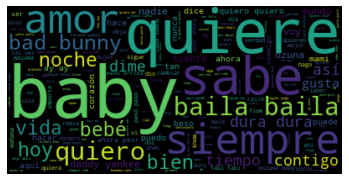

In [55]:
print_wordcloud(df)

In [ ]:
# Hacemos stemming, aunque en español no funciona muy bien
from nltk.stem import SnowballStemmer

def get_stemming(list_of_words):
    stemmer = SnowballStemmer('spanish')
    stemmed_text = [stemmer.stem(w) for w in list_of_words]
    return stemmed_text

In [75]:
get_stemming(relevant_words)

['algun',
 'dia',
 'vas',
 'cas',
 'cas',
 'llev',
 'nas',
 'pid',
 'cohet',
 'voy',
 'direct',
 'pas',
 'recuerd',
 'vid',
 'cambi',
 'import',
 'pas',
 'promet',
 'faltart',
 'sient',
 'grand',
 'intent',
 'podr',
 'tod',
 'felic',
 'graci',
 'muer',
 'volv',
 'sient',
 'grand',
 'intent',
 'podr',
 'tod',
 'felic',
 'graci',
 'muer',
 'volv',
 'qued',
 'cort',
 'palabr',
 'realment',
 'dios',
 'doy',
 'graci',
 'aqu',
 'present',
 'quier',
 'sep',
 'amo',
 'etern',
 'dij',
 'dij',
 'siempr',
 'lad',
 'perfect',
 'mejor',
 'cad',
 'detall',
 'mejor',
 'anterior',
 'aquell',
 'cancion',
 'decor',
 'ros',
 'habit',
 'vam',
 'enseñ',
 'mund',
 'amor',
 'pod',
 'junt',
 'amo',
 'tod',
 'locur',
 'ment',
 'asi',
 'encant',
 'presumirt',
 'gent',
 'sient',
 'grand',
 'intent',
 'podr',
 'tod',
 'felic',
 'graci',
 'muer',
 'volv',
 'sient',
 'grand',
 'intent',
 'podr',
 'tod',
 'felic',
 'graci',
 'muer',
 'volv',
 'despiert',
 'busc',
 'mensaj',
 'habl',
 'rio',
 'encant',
 'habl',
 'des

In [65]:
# Nube de lexemas más repetidos
def print_stemming_wordcloud(lista):
    text = " ".join(lista) # Concatena todos los versos de todas las canciones de la columna

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

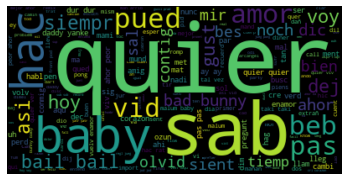

In [70]:
print_stemming_wordcloud(stemmed_text)